In [1]:
!pip instalt kagglehub

  Obtaining dependency information for kaggle from https://files.pythonhosted.org/packages/75/f6/cccedb8db42beac1c5d7cfa57d5b800b90ef91118833972af3f7b5e159c8/kaggle-1.7.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf from https://files.pythonhosted.org/packages/97/e9/7b9f1b259d509aef2b833c29a1f3c39185e2bf21c9c1be1cd11c22cb2149/protobuf-6.30.2-cp310-abi3-win_amd64.whl.metadata
  Obtaining dependency information for python-slugify from https://files.pythonhosted.org/packages/a4/62/02da182e544a51a5c3ccf4b03ab79df279f9c60c5e82d5e8bec7ca26ac11/python_slugify-8.0.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for text-unidecode from https://files.pythonhosted.org/packages/a6/a5/c0b6468d3824fe3fde30dbb5e1f687b291608f9473681bbf7dabbf5a87d7/text_unidecode-1.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/d0/30/dc54f88dd4a2b5dc8a0279bdd7270e735851848b762aeb1c1184ed1f6b14/tqd


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aneesarom/rider-with-helmet-without-helmet-number-plate")

print("Path to dataset files:", path)

E:\TrafficCompliance\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 74.6M/74.6M [00:08<00:00, 9.48MB/s]

Extracting files...


Path to dataset files: C:\Users\Prasanna Arjun\.cache\kagglehub\datasets\aneesarom\rider-with-helmet-without-helmet-number-plate\versions\3


In [6]:
! nvidia-smi

Fri Apr  4 19:51:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.70                 Driver Version: 572.70         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8              1W /   95W |     135MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
# install packages used in YOLO model
! pip install ultralytics

  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/977.3 kB ? eta -:--:--
   ---------------------------------------- 977.3/977.3 kB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.1 MB 12.2 MB/s eta 0:00:01
   ------------------------ -------------

In [3]:
# check model
import ultralytics
ultralytics.checks()

Ultralytics 8.3.101  Python-3.12.6 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Setup complete  (20 CPUs, 15.6 GB RAM, 27.3/250.0 GB disk)


In [2]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


CUDA Available: True
Device Name: NVIDIA GeForce RTX 4060 Laptop GPU


In [1]:
import torch
print(torch.__version__)
print(torch.version.cuda)  # Should show CUDA version


2.5.1+cu121
12.1


In [4]:
from glob import glob
from itertools import chain
from collections import Counter
from pprint import pprint

id2class_map = {
    '0': 'with helmet',
    '1': 'without helmet',
    '2': 'rider',
    '3': 'number_plate'
}
main_path = "../dataset/"

def print_data_size(folder_type):
    data_size = len(glob(f'{main_path}/{folder_type}/labels/*.txt'))
    print(f'{folder_type} data count: {data_size}')

def print_class_count(folder_type):
    class_list = []
    for file in glob(f'{main_path}/{folder_type}/labels/*.txt'):
        class_list.append([row.split()[0] for row in open(file, "r")])
    counter = Counter(list(chain(*class_list)))
    print(f'-- data class count')
    pprint({f'{k}. {id2class_map[k]}':v for k, v in counter.items()})
    print()

print_data_size('train')
print_class_count('train')
print_data_size('val')
print_class_count('val')

train data count: 104
-- data class count
{'0. with helmet': 64,
 '1. without helmet': 93,
 '2. rider': 120,
 '3. number_plate': 116}

val data count: 20
-- data class count
{'0. with helmet': 13,
 '1. without helmet': 15,
 '2. rider': 23,
 '3. number_plate': 22}



In [6]:
# plot training images
import os
import cv2
from matplotlib import pyplot as plt

main_path = f"../dataset/"

def get_bbox_and_label(image_name, data_type='train', main_path=main_path):
    ''' get bbox and label information from label txt files '''

    # read file from path
    lbl_path = os.path.join(main_path, data_type, 'labels', f'{image_name}.txt')
    with open(lbl_path, 'r') as f:
        lines = f.readlines()

    # extract bboxes and labels from the label file
    bboxes = [
        [float(n) for n in line.split()[1:]]
        for line in lines
    ]
    labels = [id2class_map[line.split()[0]] for line in lines]

    return bboxes, labels

def load_image(image_name, data_type='train', main_path=main_path):
    img_path = os.path.join(main_path, data_type, 'images', f'{image_name}.jpg')
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_bbox_coordinates(img, bbox):

    img_height, img_width, _ = img.shape
    x_center, y_center, bbox_width, bbox_height = bbox

    # calculate the coordinates of the bounding box
    x_center_pixel = x_center * img_width
    y_center_pixel = y_center * img_height
    half_width = bbox_width * img_width / 2
    half_height = bbox_height * img_height / 2

    x_min = int(x_center_pixel - half_width)
    y_min = int(y_center_pixel - half_height)
    x_max = int(x_center_pixel + half_width)
    y_max = int(y_center_pixel + half_height)

    return x_min, y_min, x_max, y_max

class2color_map = {
    'with helmet': (0,255,128),
    'without helmet': (255,51,51),
    'rider': (51,255,255),
    'number_plate': (224,102,255)
}

def plot_image(image_name, data_type='train', class2color_map=class2color_map):
    img = load_image(image_name=image_name, data_type=data_type)
    bboxes, labels = get_bbox_and_label(image_name=image_name, data_type=data_type)
    for bbox, label in zip(bboxes, labels):

        # get bbox and label info
        color = class2color_map[label]
        x_min, y_min, x_max, y_max = get_bbox_coordinates(img, bbox)

        # add bounding box with rectangle
        img = cv2.rectangle(img,(x_min,y_min),(x_max,y_max), color, 2)

        # add label info
        img = cv2.putText(
                img,
                label,
                (x_min, y_min + 10),
                fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                fontScale = 0.6,
                color = color,
                thickness=2
            )
    plt.imshow(img)
    plt.show()

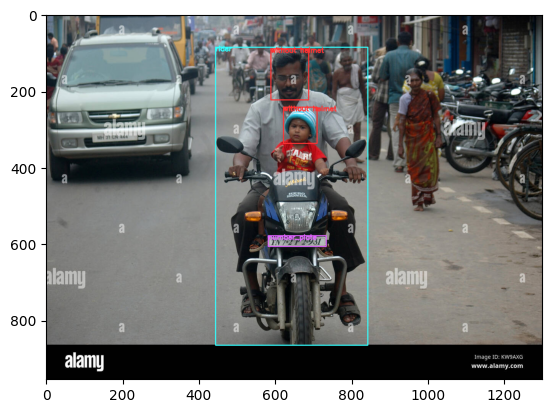

In [13]:
plot_image(image_name='new100')

In [14]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv8n model
model = YOLO('../models/yolov8n.pt')

# Display model information (optional)
model.info()

100%|██████████| 6.25M/6.25M [00:00<00:00, 11.5MB/s]


YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [15]:
import yaml

# read the content of coco128.yaml
with open(os.path.join(main_path, 'coco128.yaml'), 'r') as file:
    print(file.read())

train: /train/images
val: /val/images

nc: 4

names: ["with helmet", "without helmet", "rider", "number plate"]


In [16]:
# create the yaml based on coco128 for model training
data = {
    'train': '../dataset/train',
    'val': '../dataset/val',
    'nc': 4,
    'names': [
        'with helmet',
        'without helmet',
        'rider',
        'number plate'
    ]
}

with open('../dataset/data.yaml', 'w') as file:
    yaml.dump(data, file)

# check the content of data.yaml
with open('../dataset/data.yaml', 'r') as file:
    print(file.read())

names:
- with helmet
- without helmet
- rider
- number plate
nc: 4
train: ../dataset/train
val: ../dataset/val



In [19]:
# disable wandb
os.environ['WANDB_MODE'] = "disabled"


# command to train the YOLOv8 model
model.train(
    data="../dataset/data.yaml",
    epochs=50,
    batch=8,
    device="cuda",
    project="../models",  # Custom directory
)


Ultralytics 8.3.101  Python-3.12.6 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=../dataset/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=1, project=../models, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

100%|██████████| 5.35M/5.35M [00:00<00:00, 11.1MB/s]


AMP: checks passed 


train: Scanning E:\TrafficCompliance\dataset\train\labels.cache... 102 images, 0 backgrounds, 2 corrupt: 100%|██████████| 104/104 [00:00<?, ?it/s]

train: WARNING  E:\TrafficCompliance\dataset\train\images\new128.jpg: ignoring corrupt image/label: cannot identify image file 'E:\\TrafficCompliance\\dataset\\train\\images\\new128.jpg'
train: WARNING  E:\TrafficCompliance\dataset\train\images\new3.jpg: ignoring corrupt image/label: invalid image format GIF. Supported formats are:
images: {'png', 'bmp', 'tif', 'jpeg', 'pfm', 'jpg', 'tiff', 'dng', 'mpo', 'webp', 'heic'}
videos: {'mov', 'm4v', 'avi', 'mpeg', 'asf', 'webm', 'mkv', 'mp4', 'gif', 'ts', 'wmv', 'mpg'}



val: Scanning E:\TrafficCompliance\dataset\val\labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to ..\models\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to ..\models\train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.12G     0.5384     0.6325     0.9332         35        640: 100%|██████████| 13/13 [00:05<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.28it/s]

                   all         20         73      0.882      0.951      0.948      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.27G     0.5451     0.5759     0.9241         48        640: 100%|██████████| 13/13 [00:01<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]

                   all         20         73      0.879      0.928      0.944       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.27G     0.5602     0.5874     0.9346         52        640: 100%|██████████| 13/13 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.59it/s]

                   all         20         73      0.927      0.924      0.949      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.27G     0.5934     0.6154     0.9593         49        640: 100%|██████████| 13/13 [00:01<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.94it/s]

                   all         20         73      0.896      0.944      0.934      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.27G     0.5881     0.5889     0.9429         50        640: 100%|██████████| 13/13 [00:01<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.17it/s]

                   all         20         73      0.922      0.922      0.931      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.27G     0.6102     0.5999     0.9327         65        640: 100%|██████████| 13/13 [00:01<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.29it/s]

                   all         20         73      0.953       0.93      0.941      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.27G     0.6273     0.6024     0.9432         52        640: 100%|██████████| 13/13 [00:02<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.70it/s]

                   all         20         73      0.932      0.924      0.941      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.27G     0.6525     0.6373     0.9687         51        640: 100%|██████████| 13/13 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.04it/s]

                   all         20         73       0.93      0.896      0.942      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.27G     0.6365     0.6442     0.9586         49        640: 100%|██████████| 13/13 [00:01<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.15it/s]

                   all         20         73      0.855      0.915      0.925      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.27G     0.6119     0.6239      0.962         56        640: 100%|██████████| 13/13 [00:02<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.32it/s]

                   all         20         73      0.884      0.909      0.914       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.27G     0.6233      0.615     0.9571         49        640: 100%|██████████| 13/13 [00:02<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.57it/s]


                   all         20         73      0.882      0.895      0.895       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.27G     0.6129     0.6256     0.9576         50        640: 100%|██████████| 13/13 [00:01<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.64it/s]

                   all         20         73      0.887      0.904       0.92       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.27G     0.6158     0.6127     0.9547         46        640: 100%|██████████| 13/13 [00:01<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.79it/s]

                   all         20         73      0.901        0.9      0.928      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.27G      0.612     0.5927     0.9368         52        640: 100%|██████████| 13/13 [00:01<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.82it/s]

                   all         20         73      0.898      0.884      0.922      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.27G     0.5969     0.5941     0.9384         46        640: 100%|██████████| 13/13 [00:01<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.22it/s]

                   all         20         73      0.872      0.922      0.924      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.27G     0.5809      0.579      0.969         29        640: 100%|██████████| 13/13 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.23it/s]

                   all         20         73      0.872      0.901      0.931      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.27G     0.5755     0.5461     0.9303         46        640: 100%|██████████| 13/13 [00:01<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.77it/s]


                   all         20         73       0.93      0.905      0.926      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.27G     0.6097     0.5972     0.9596         34        640: 100%|██████████| 13/13 [00:01<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.13it/s]

                   all         20         73      0.901       0.92      0.914      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.27G      0.591     0.5791     0.9485         46        640: 100%|██████████| 13/13 [00:01<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.52it/s]

                   all         20         73      0.887      0.931       0.92      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.27G     0.5503     0.5337     0.9268         39        640: 100%|██████████| 13/13 [00:01<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.28it/s]

                   all         20         73      0.907      0.932      0.937       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.27G      0.545     0.5368     0.9273         45        640: 100%|██████████| 13/13 [00:01<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.56it/s]

                   all         20         73       0.93       0.94      0.941      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.27G     0.5729     0.5485      0.923         53        640: 100%|██████████| 13/13 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]

                   all         20         73      0.911      0.957      0.938      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.27G     0.5575     0.5472     0.9612         26        640: 100%|██████████| 13/13 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         20         73      0.918      0.918      0.936      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.27G     0.5536      0.535     0.9403         39        640: 100%|██████████| 13/13 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         20         73      0.908      0.921      0.931      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.27G      0.543     0.5222     0.9465         45        640: 100%|██████████| 13/13 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         20         73      0.929      0.903      0.932      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.27G     0.5618     0.5287     0.9329         46        640: 100%|██████████| 13/13 [00:02<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.29it/s]

                   all         20         73      0.944        0.9      0.924       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.27G     0.5211      0.497      0.921         52        640: 100%|██████████| 13/13 [00:01<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.74it/s]

                   all         20         73       0.92        0.9      0.909      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.27G     0.5466     0.5163     0.9252         44        640: 100%|██████████| 13/13 [00:01<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.45it/s]

                   all         20         73      0.946      0.877      0.913      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.27G     0.5166     0.5126     0.9142         28        640: 100%|██████████| 13/13 [00:01<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.31it/s]


                   all         20         73      0.949      0.879      0.916      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.27G     0.5021     0.4956     0.9235         57        640: 100%|██████████| 13/13 [00:01<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.47it/s]

                   all         20         73      0.922      0.883      0.915      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.27G     0.5496     0.5117     0.9335         42        640: 100%|██████████| 13/13 [00:01<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.31it/s]

                   all         20         73      0.925      0.908       0.94      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.27G     0.5211     0.4951     0.9241         37        640: 100%|██████████| 13/13 [00:01<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.40it/s]

                   all         20         73      0.943       0.91      0.942      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.27G     0.5238     0.4932     0.9246         40        640: 100%|██████████| 13/13 [00:01<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.84it/s]

                   all         20         73      0.951      0.911      0.953      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.27G     0.4857     0.4745     0.9127         41        640: 100%|██████████| 13/13 [00:01<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.30it/s]

                   all         20         73      0.949      0.905      0.951      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.27G      0.526     0.4775     0.9265         47        640: 100%|██████████| 13/13 [00:01<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.29it/s]

                   all         20         73      0.937      0.891      0.949      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.27G     0.5203     0.4821     0.9208         34        640: 100%|██████████| 13/13 [00:01<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.00it/s]

                   all         20         73      0.917      0.911      0.946      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.27G     0.5031     0.4759     0.9121         64        640: 100%|██████████| 13/13 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.52it/s]

                   all         20         73      0.906      0.924      0.947      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.27G     0.4981      0.488     0.9321         38        640: 100%|██████████| 13/13 [00:01<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.06it/s]

                   all         20         73      0.923      0.903      0.942      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.27G      0.481     0.4553      0.929         47        640: 100%|██████████| 13/13 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.61it/s]

                   all         20         73       0.91       0.92      0.951      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.27G     0.5018     0.4634     0.9071         54        640: 100%|██████████| 13/13 [00:01<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.94it/s]


                   all         20         73      0.947      0.886      0.951      0.764
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.27G     0.4824     0.5679      0.888         22        640: 100%|██████████| 13/13 [00:05<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.58it/s]

                   all         20         73      0.949      0.895      0.948      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.27G     0.4489     0.5314      0.858         22        640: 100%|██████████| 13/13 [00:01<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.85it/s]

                   all         20         73      0.929      0.912      0.944      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.27G     0.4543      0.491     0.8708         30        640: 100%|██████████| 13/13 [00:01<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.21it/s]

                   all         20         73      0.941      0.899      0.946      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.27G     0.4647     0.4999     0.8755         18        640: 100%|██████████| 13/13 [00:01<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.98it/s]

                   all         20         73      0.935      0.906      0.934      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.27G     0.4684     0.4985     0.8929         18        640: 100%|██████████| 13/13 [00:01<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.18it/s]

                   all         20         73      0.939      0.912      0.934      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.27G      0.447     0.4834     0.8539         20        640: 100%|██████████| 13/13 [00:01<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.59it/s]

                   all         20         73      0.937      0.908      0.932      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.27G     0.4518     0.4635     0.8637         22        640: 100%|██████████| 13/13 [00:01<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.25it/s]


                   all         20         73      0.932      0.908      0.934      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.27G     0.4261     0.4494     0.8701         20        640: 100%|██████████| 13/13 [00:01<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.85it/s]

                   all         20         73      0.922      0.937      0.938      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.27G     0.4175     0.4447     0.8471         20        640: 100%|██████████| 13/13 [00:01<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.32it/s]

                   all         20         73      0.948      0.917      0.934      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.27G      0.402     0.4381     0.8583         18        640: 100%|██████████| 13/13 [00:01<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.58it/s]

                   all         20         73      0.951      0.917      0.936      0.763



50 epochs completed in 0.036 hours.
Optimizer stripped from ..\models\train3\weights\last.pt, 6.2MB
Optimizer stripped from ..\models\train3\weights\best.pt, 6.2MB

Validating ..\models\train3\weights\best.pt...
Ultralytics 8.3.101  Python-3.12.6 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.84it/s]


                   all         20         73        0.9      0.924      0.947      0.784
           with helmet         12         13          1      0.869      0.945      0.741
        without helmet         10         15      0.774      0.914      0.917      0.746
                 rider         20         23      0.896      0.913      0.931      0.849
          number plate         20         22      0.928          1      0.993      0.802
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to ..\models\train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000018A0DBD26C0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

In [2]:
from ultralytics import YOLO
model = YOLO('../models/train3/weights/best.pt')

In [7]:
def plot_pred_image(image_name, id2class_map=id2class_map, class2color_map=class2color_map):
    image_path = os.path.join(main_path, 'val', 'images', f'{image_name}.jpg')

    # get plot elements (bbox, labels) from `predict()` results
    results = model.predict(image_path)
    r = results[0]
    img = r.orig_img
    bboxes = r.boxes.xyxy.tolist()
    labels = [id2class_map[str(int(c))] for c in r.boxes.cls.tolist()]
    for bbox, label in zip(bboxes, labels):
        # get bbox and label info
        color = class2color_map[label]
        x_min, y_min, x_max, y_max = [int(n) for n in bbox]

        # add bounding box with rectangle
        img = cv2.rectangle(img,(x_min,y_min),(x_max,y_max), color, 2)

        # add label info
        img = cv2.putText(
                img,
                label,
                (x_min, y_min + 10),
                fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                fontScale = 0.6,
                color = color,
                thickness=2
            )
    plt.imshow(img)
    plt.show()

prediction ↓

image 1/1 E:\TrafficCompliance\notebooks\..\dataset\val\images\new94.jpg: 608x640 1 with helmet, 1 rider, 2 number plates, 74.9ms
Speed: 9.7ms preprocess, 74.9ms inference, 228.5ms postprocess per image at shape (1, 3, 608, 640)


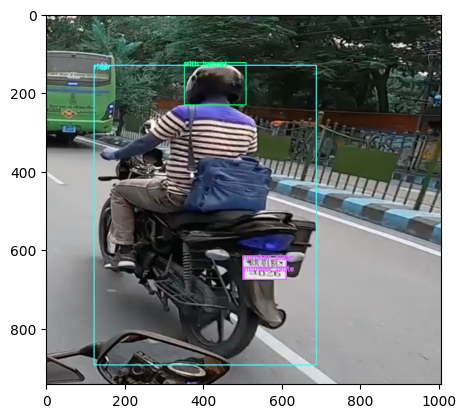

actual image ↓


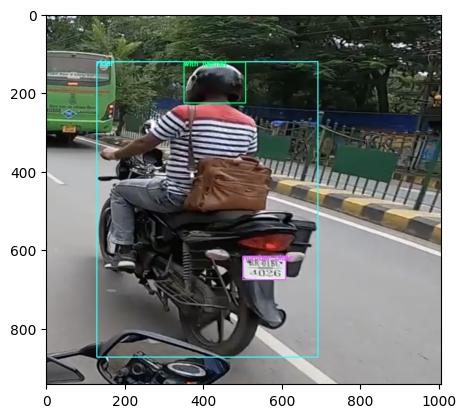

In [8]:
image_name = 'new94'
print('prediction ↓')
plot_pred_image(image_name=image_name)
print('actual image ↓')
plot_image(image_name=image_name, data_type='val')

In [11]:
path='../models/'
model_dump = YOLO('../models/train3/weights/best.pt')
model_dump.export(format='onnx')

Ultralytics 8.3.101  Python-3.12.6 torch-2.5.1+cu121 CPU (12th Gen Intel Core(TM) i7-12700H)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '..\models\train3\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ---------------------------------------- 14.5/14.5 MB 11.9 MB/s eta 0:00:00
   --------------------------------------- 213.1/213.1 MB 11.8 MB/s eta 0:00:00

requirements: AutoUpdate success  46.6s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements:  Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.49...
ONNX: export success  47.9s, saved as '..\models\train3\weights\best.onnx' (11.7 MB)

Export complete (48.4s)
Results saved to

'..\\models\\train3\\weights\\best.onnx'